In [1]:
pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mikhailtiurin","key":"f0e47f05df0821ee8d08559769ebe96f"}'}

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d yaswanthgali/dog-images

 99% 745M/750M [00:13<00:00, 43.1MB/s]
100% 750M/750M [00:13<00:00, 57.9MB/s]


In [7]:
!unzip dog-images.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: images/images/n02108089-boxer/n02108089_11687.jpg  
  inflating: images/images/n02108089-boxer/n02108089_117.jpg  
  inflating: images/images/n02108089-boxer/n02108089_11807.jpg  
  inflating: images/images/n02108089-boxer/n02108089_11875.jpg  
  inflating: images/images/n02108089-boxer/n02108089_122.jpg  
  inflating: images/images/n02108089-boxer/n02108089_12232.jpg  
  inflating: images/images/n02108089-boxer/n02108089_125.jpg  
  inflating: images/images/n02108089-boxer/n02108089_12738.jpg  
  inflating: images/images/n02108089-boxer/n02108089_12739.jpg  
  inflating: images/images/n02108089-boxer/n02108089_12827.jpg  
  inflating: images/images/n02108089-boxer/n02108089_13340.jpg  
  inflating: images/images/n02108089-boxer/n02108089_13526.jpg  
  inflating: images/images/n02108089-boxer/n02108089_1353.jpg  
  inflating: images/images/n02108089-boxer/n02108089_1355.jpg  
  inflating: images/images/n02

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


In [9]:
import tensorflow as tf
import cv2
from tensorflow import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Flatten

In [14]:
!unzip dog-images.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: images/images/n02108089-boxer/n02108089_11687.jpg  
  inflating: images/images/n02108089-boxer/n02108089_117.jpg  
  inflating: images/images/n02108089-boxer/n02108089_11807.jpg  
  inflating: images/images/n02108089-boxer/n02108089_11875.jpg  
  inflating: images/images/n02108089-boxer/n02108089_122.jpg  
  inflating: images/images/n02108089-boxer/n02108089_12232.jpg  
  inflating: images/images/n02108089-boxer/n02108089_125.jpg  
  inflating: images/images/n02108089-boxer/n02108089_12738.jpg  
  inflating: images/images/n02108089-boxer/n02108089_12739.jpg  
  inflating: images/images/n02108089-boxer/n02108089_12827.jpg  
  inflating: images/images/n02108089-boxer/n02108089_13340.jpg  
  inflating: images/images/n02108089-boxer/n02108089_13526.jpg  
  inflating: images/images/n02108089-boxer/n02108089_1353.jpg  
  inflating: images/images/n02108089-boxer/n02108089_1355.jpg  
  inflating: images/images/n02

In [16]:
plt.figure(figsize=(20,20))
test_folder=os.listdir('images/images/n02116738-African_hunting_dog')

<Figure size 2000x2000 with 0 Axes>

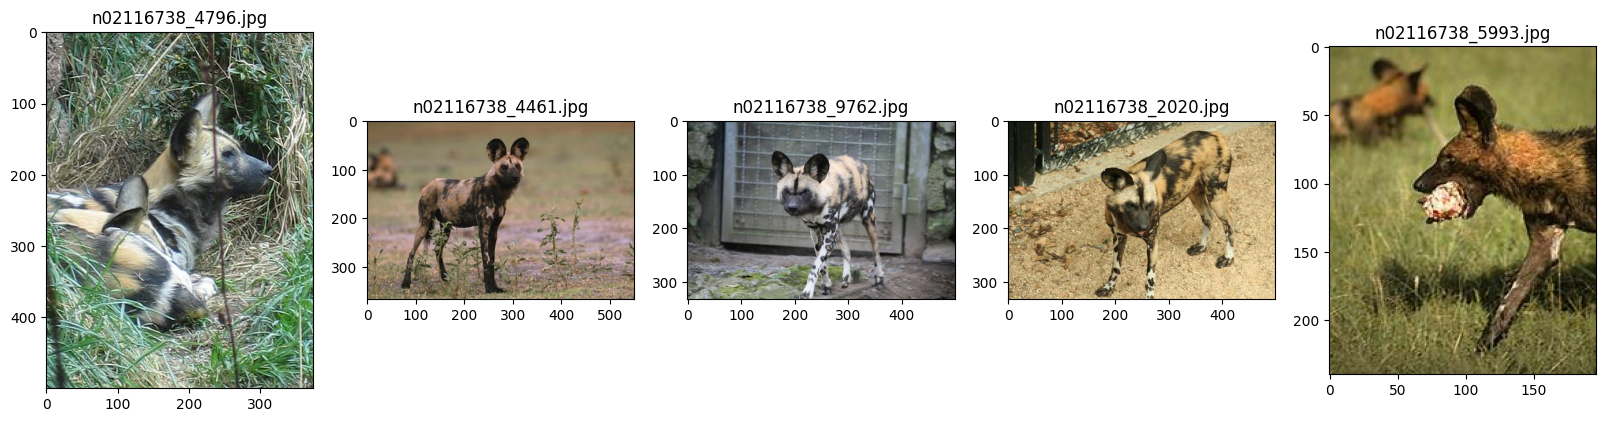

In [32]:
plt.figure(figsize=(20,20))
list_img = []
for i in range(5):
    file = random.choice(os.listdir('images/images/n02116738-African_hunting_dog'))
    image_path= os.path.join('images/images/n02116738-African_hunting_dog', file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)
    list_img.append(img)

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# to rotate the image buy exactly 30 degrees
from scipy.ndimage import rotate
def rotate_image_30_degrees(image):
# Rotate image by 30 degrees
  return rotate(image, 30, reshape=False, mode='nearest')

def rotate_image_180_degrees(image):
  return rotate(image, 180, reshape=False, mode='nearest')

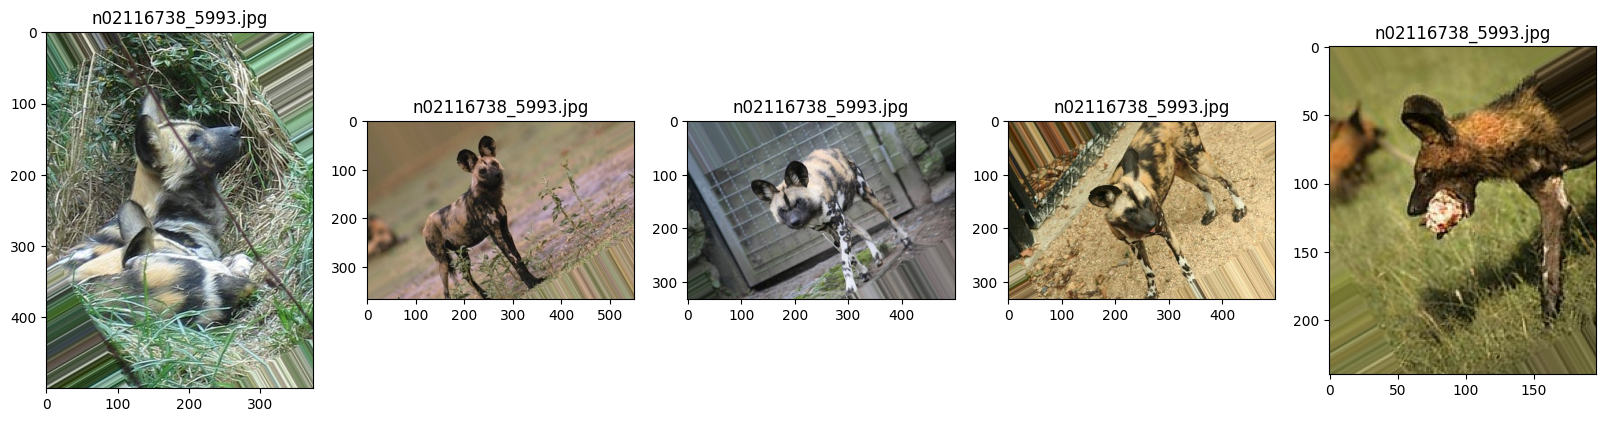

In [33]:
rotated_img = []
for img in list_img:
  rotated_img.append(rotate_image_30_degrees(img))
plt.figure(figsize=(20,20))
for i,img in enumerate(rotated_img):
  ax=plt.subplot(3,5,i+1)
  ax.title.set_text(file)
  plt.imshow(img)


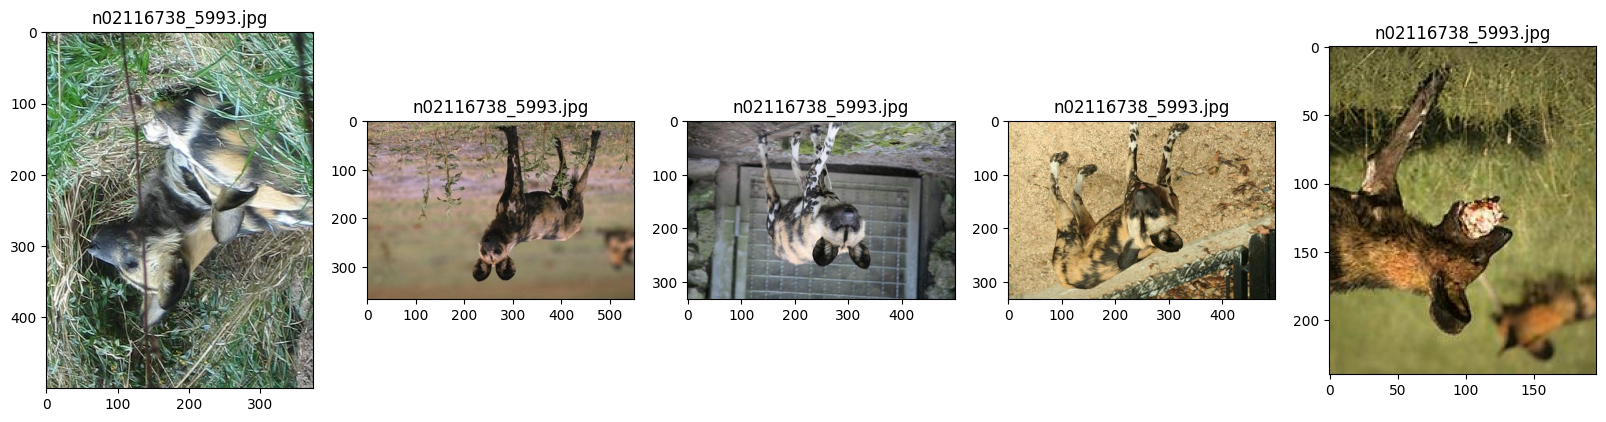

In [35]:
rotated_img = []
for img in list_img:
  rotated_img.append(rotate_image_180_degrees(img))
plt.figure(figsize=(20,20))
for i,img in enumerate(rotated_img):
  ax=plt.subplot(3,5,i+1)
  ax.title.set_text(file)
  plt.imshow(img)

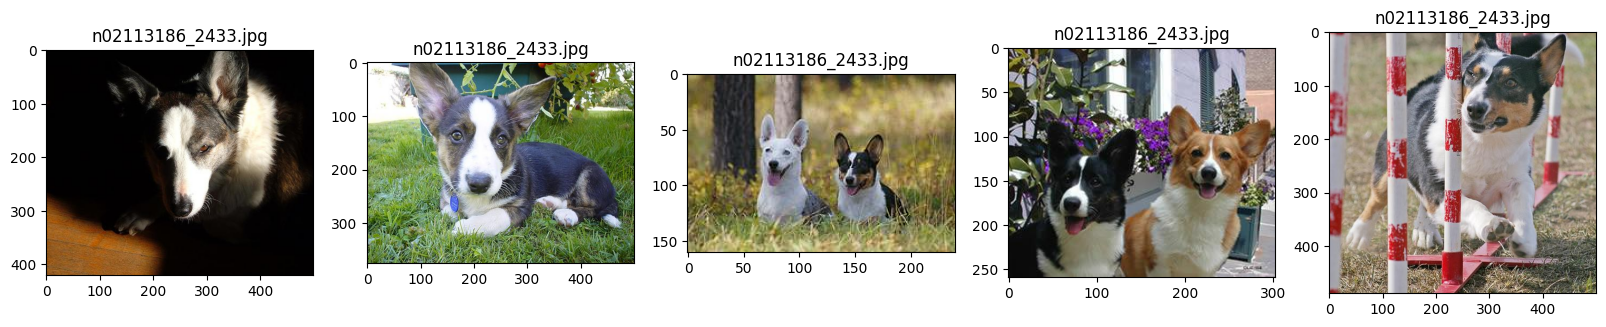

In [29]:
list_img = []
plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir('images/images/n02113186-Cardigan/'))
    image_path= os.path.join('images/images/n02113186-Cardigan/', file)
    img=mpimg.imread(image_path)
    list_img.append(img)

for i, img in enumerate(list_img):
    ax=plt.subplot(3,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(vertical_flip=True) # to flip vertically
data_generator = ImageDataGenerator(horizontal_flip=True) # to flip horizontally
#You can also combine both :
data_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

In [38]:
#the brightness of each image will be randomly changed to a value between 50% (darker) and 150% (brighter) of the original brightness.
data_generator = ImageDataGenerator(brightness_range=(0.5, 1.5))

#Adjusting Contrast
from PIL import ImageEnhance, Image
import numpy as np

def adjust_contrast(image):
   # Convert the image to PIL format
   pil_img = Image.fromarray((image * 255).astype(np.uint8))
   # Enhance the contrast
   contrast = ImageEnhance.Contrast(pil_img)
   pil_img_enhanced = contrast.enhance(2.0)  # Adjust 2.0 for desired contrast
   # Convert back to numpy array
   return np.array(pil_img_enhanced) / 255.0

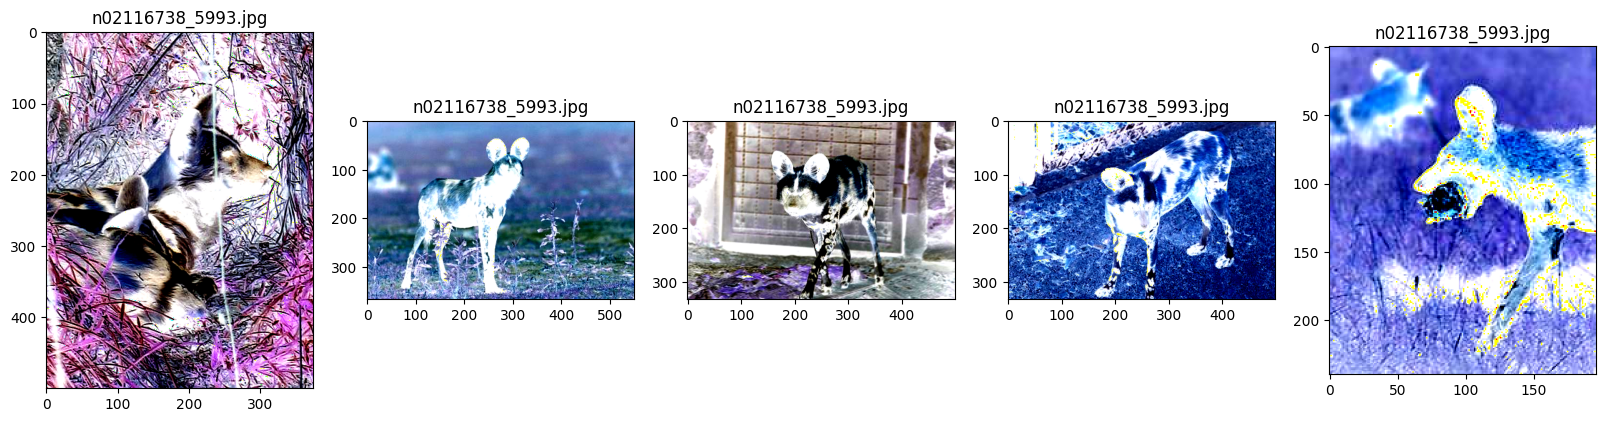

In [40]:
brightness = []
for img in list_img:
  brightness.append(adjust_contrast(img))
plt.figure(figsize=(20,20))
for i,img in enumerate(brightness):
  ax=plt.subplot(3,5,i+1)
  ax.title.set_text(file)
  plt.imshow(img)

In [41]:
import cv2

def flip_image(image, mode='horizontal'):
    """
    Flip the input image horizontally or vertically.

    Parameters:
    - image: Input image as a numpy array.
    - mode: Mode of flipping, either 'horizontal' or 'vertical'. Default is 'horizontal'.

    Returns:
    - Flipped image as a numpy array.
    """
    if mode == 'horizontal':
        # Flip the image horizontally
        flipped_image = cv2.flip(image, 1)
    elif mode == 'vertical':
        # Flip the image vertically
        flipped_image = cv2.flip(image, 0)
    else:
        raise ValueError("Invalid mode. Mode must be 'horizontal' or 'vertical'.")

    return flipped_image

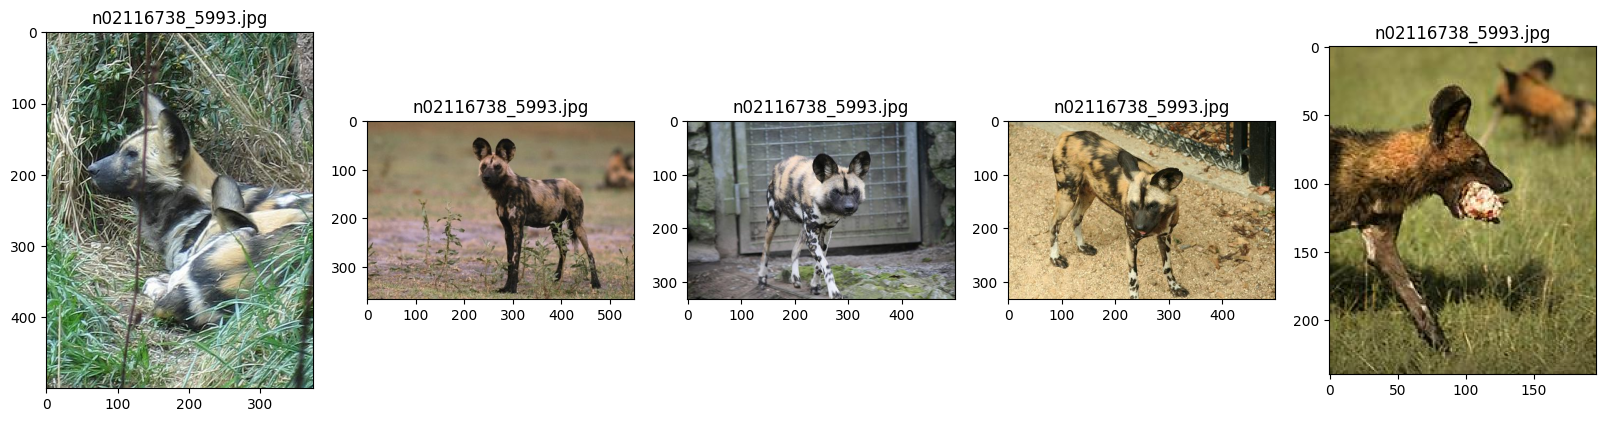

In [42]:
flipped_img = []
for img in list_img:
  flipped_img.append(flip_image(img))
plt.figure(figsize=(20,20))
for i,img in enumerate(flipped_img):
  ax=plt.subplot(3,5,i+1)
  ax.title.set_text(file)
  plt.imshow(img)